In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(100)

In [4]:
class Layer:
    
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.rand(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.rand(n_neurons)
        self.last_activation = None
        self.error = None
        self.delta = None

    def activate(self, x):
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r

        if self.activation == 'tanh':
            return np.tanh(r)

        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))

        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r

        if self.activation == 'tanh':
            return 1 - r ** 2

        if self.activation == 'sigmoid':
            return r * (1 - r)

        return r

In [5]:
class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, A):
        for layer in self._layers:
            A = layer.activate(A)

        return A

    def predict(self, X):

        ff = self.feed_forward(X)

        if ff.ndim == 1:
            return np.argmax(ff)

        return np.argmax(ff, axis=1)

    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]

            if layer == self._layers[-1]:
                layer.error = y - output
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)

        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            if i % 10 == 0:
                mse = np.mean(np.square(y - nn.feed_forward(X)))
                mses.append(mse)
                print('Epoch: #%s, MSE: %f' % (i, float(mse)))

        return mses

    @staticmethod
    def accuracy(y_pred, y_true):
        return (y_pred == y_true).mean()


Epoch: #0, MSE: 0.209580
Epoch: #10, MSE: 0.202859
Epoch: #20, MSE: 0.197935
Epoch: #30, MSE: 0.195109
Epoch: #40, MSE: 0.193778
Epoch: #50, MSE: 0.193141
Epoch: #60, MSE: 0.192707
Epoch: #70, MSE: 0.192276
Epoch: #80, MSE: 0.191765
Epoch: #90, MSE: 0.191120
Epoch: #100, MSE: 0.190278
Epoch: #110, MSE: 0.189151
Epoch: #120, MSE: 0.187634
Epoch: #130, MSE: 0.185638
Epoch: #140, MSE: 0.183153
Epoch: #150, MSE: 0.180260
Epoch: #160, MSE: 0.177081
Epoch: #170, MSE: 0.173728
Epoch: #180, MSE: 0.170312
Epoch: #190, MSE: 0.166933
Epoch: #200, MSE: 0.163665
Epoch: #210, MSE: 0.160547
Epoch: #220, MSE: 0.157578
Epoch: #230, MSE: 0.154737
Epoch: #240, MSE: 0.151985
Epoch: #250, MSE: 0.149284
Epoch: #260, MSE: 0.146593
Epoch: #270, MSE: 0.143875
Epoch: #280, MSE: 0.141101
Epoch: #290, MSE: 0.138250
Epoch: #300, MSE: 0.135315
Epoch: #310, MSE: 0.132304
Epoch: #320, MSE: 0.129244
Epoch: #330, MSE: 0.126177
Epoch: #340, MSE: 0.123154
Epoch: #350, MSE: 0.120228
Epoch: #360, MSE: 0.117442
Epoch: #370,

Epoch: #3220, MSE: 0.083382
Epoch: #3230, MSE: 0.083380
Epoch: #3240, MSE: 0.083378
Epoch: #3250, MSE: 0.083375
Epoch: #3260, MSE: 0.083373
Epoch: #3270, MSE: 0.083370
Epoch: #3280, MSE: 0.083368
Epoch: #3290, MSE: 0.083366
Epoch: #3300, MSE: 0.083363
Epoch: #3310, MSE: 0.083361
Epoch: #3320, MSE: 0.083359
Epoch: #3330, MSE: 0.083357
Epoch: #3340, MSE: 0.083354
Epoch: #3350, MSE: 0.083352
Epoch: #3360, MSE: 0.083350
Epoch: #3370, MSE: 0.083348
Epoch: #3380, MSE: 0.083346
Epoch: #3390, MSE: 0.083343
Epoch: #3400, MSE: 0.083341
Epoch: #3410, MSE: 0.083339
Epoch: #3420, MSE: 0.083337
Epoch: #3430, MSE: 0.083335
Epoch: #3440, MSE: 0.083333
Epoch: #3450, MSE: 0.083331
Epoch: #3460, MSE: 0.083329
Epoch: #3470, MSE: 0.083327
Epoch: #3480, MSE: 0.083325
Epoch: #3490, MSE: 0.083323
Epoch: #3500, MSE: 0.083321
Epoch: #3510, MSE: 0.083319
Epoch: #3520, MSE: 0.083317
Epoch: #3530, MSE: 0.083315
Epoch: #3540, MSE: 0.083313
Epoch: #3550, MSE: 0.083311
Epoch: #3560, MSE: 0.083309
Epoch: #3570, MSE: 0

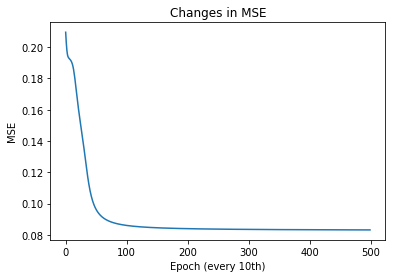

In [17]:
nn = NeuralNetwork()
nn.add_layer(Layer(2, 3, 'tanh'))
nn.add_layer(Layer(3, 3, 'sigmoid'))
nn.add_layer(Layer(3, 2, 'sigmoid'))

# Define dataset ( NAND Operation)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1], [1], [1], [0]])

# Train the neural network
errors = nn.train(X, y, 0.3, 500)
print('Accuracy: %.2f%%' % (nn.accuracy(nn.predict(X), y.flatten()) * 100))

# Plot changes in mse
plt.plot(errors)
plt.title('Changes in MSE')
plt.xlabel('Epoch (every 10th)')
plt.ylabel('MSE')
plt.show()